# In this project we will make a monte carlo simulation of stocks

## Muedi Mbambala
###09 September 2020

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


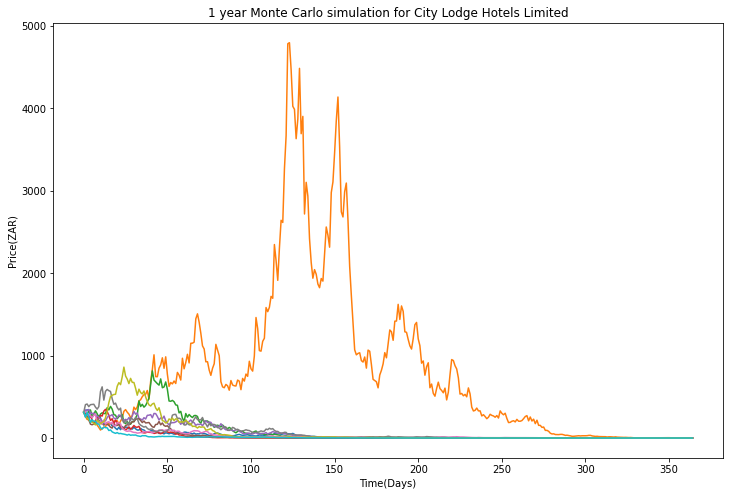

In [19]:
def get_simulation(ticker, name):
  data = pd.DataFrame()
  data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2020-1-1')['Adj Close']

  log_returns = np.log(1 + data.pct_change())
  
  u = log_returns.mean()
  var = log_returns.var()

  drift = u - (0.5 * var)
  stdev = log_returns.std()

  t_intervals = 365
  iterations = 10

  daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))

  S0 = data.iloc[-1]

  price_list = np.zeros_like(daily_returns)
  price_list[0] = S0

  for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

  plt.figure(figsize=(12,8))
  plt.title("1 year Monte Carlo simulation for " + name)
  plt.xlabel("Time(Days)")
  plt.ylabel("Price(ZAR)")
  plt.plot(price_list)
  plt.savefig("tempplot.png")
  plt.show()

get_simulation("CLH.JO","City Lodge Hotels Limited")